<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_3_6_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.6_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.285575,53.477804,39.023712,1.115679e+06,1.115855e+06,-3.292801e+06,4.408656e+06
1,0.0,1.0,62.749262,51.928208,38.231461,8.643432e+05,8.645062e+05,-3.717032e+06,4.581538e+06
2,0.0,2.0,85.898120,34.418029,91.090209,-3.919421e+05,-3.917207e+05,4.349390e+06,-4.741110e+06
3,0.0,3.0,55.137433,57.449110,57.729812,-4.333773e+06,-4.333593e+06,-9.421181e+05,-3.391475e+06
4,0.0,4.0,41.225045,69.253238,69.731805,4.318150e+06,4.318340e+06,6.808086e+05,3.637532e+06
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.294746,92.518305,59.230443,3.159841e+06,3.160026e+06,3.930537e+06,-7.705108e+05
19996,999.0,16.0,92.663682,58.512599,35.091714,3.703651e+05,3.705614e+05,1.147181e+06,-7.766194e+05
19997,999.0,17.0,63.062248,86.565478,27.853802,1.632633e+07,1.632652e+07,4.038539e+06,1.228798e+07
19998,999.0,18.0,47.655607,57.944117,86.192826,1.087113e+05,1.089131e+05,-5.519967e+04,1.641128e+05


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    73.285575  53.477804  ... -3.292801e+06  4.408656e+06
      1.0    62.749262  51.928208  ... -3.717032e+06  4.581538e+06
      2.0    85.898120  34.418029  ...  4.349390e+06 -4.741110e+06
      3.0    55.137433  57.449110  ... -9.421181e+05 -3.391475e+06
      4.0    41.225045  69.253238  ...  6.808086e+05  3.637532e+06
...                ...        ...  ...           ...           ...
999.0 15.0   23.294746  92.518305  ...  3.930537e+06 -7.705108e+05
      16.0   92.663682  58.512599  ...  1.147181e+06 -7.766194e+05
      17.0   63.062248  86.565478  ...  4.038539e+06  1.228798e+07
      18.0   47.655607  57.944117  ... -5.519967e+04  1.641128e+05
      19.0   99.921349  36.147862  ... -1.361317e+06  2.186616e+06

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    73.285575  53.477804  ... -3.292801e+06  4.408656e+06
      1.0    62.749262  51.928208  ... -3.717032e+06  4.581538e+06
      2.0    85.898120  34.418029  ...  4.349390e+06 -4.741110e+06
      3.0    55.137433  57.449110  ... -9.421181e+05 -3.391475e+06
      4.0    41.225045  69.253238  ...  6.808086e+05  3.637532e+06
...                ...        ...  ...           ...           ...
999.0 15.0   23.294746  92.518305  ...  3.930537e+06 -7.705108e+05
      16.0   92.663682  58.512599  ...  1.147181e+06 -7.766194e+05
      17.0   63.062248  86.565478  ...  4.038539e+06  1.228798e+07
      18.0   47.655607  57.944117  ... -5.519967e+04  1.641128e+05
      19.0   99.921349  36.147862  ... -1.361317e+06  2.186616e+06

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.285575,53.477804,39.023712,1.115679e+06,1.115855e+06,-3.292801e+06,4.408656e+06
1,0.0,1.0,62.749262,51.928208,38.231461,8.643432e+05,8.645062e+05,-3.717032e+06,4.581538e+06
2,0.0,2.0,85.898120,34.418029,91.090209,-3.919421e+05,-3.917207e+05,4.349390e+06,-4.741110e+06
3,0.0,3.0,55.137433,57.449110,57.729812,-4.333773e+06,-4.333593e+06,-9.421181e+05,-3.391475e+06
4,0.0,4.0,41.225045,69.253238,69.731805,4.318150e+06,4.318340e+06,6.808086e+05,3.637532e+06
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.294746,92.518305,59.230443,3.159841e+06,3.160026e+06,3.930537e+06,-7.705108e+05
19996,999.0,16.0,92.663682,58.512599,35.091714,3.703651e+05,3.705614e+05,1.147181e+06,-7.766194e+05
19997,999.0,17.0,63.062248,86.565478,27.853802,1.632633e+07,1.632652e+07,4.038539e+06,1.228798e+07
19998,999.0,18.0,47.655607,57.944117,86.192826,1.087113e+05,1.089131e+05,-5.519967e+04,1.641128e+05


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    73.285575  53.477804  ... -3.292801e+06  4.408656e+06
      1.0    62.749262  51.928208  ... -3.717032e+06  4.581538e+06
      2.0    85.898120  34.418029  ...  4.349390e+06 -4.741110e+06
      3.0    55.137433  57.449110  ... -9.421181e+05 -3.391475e+06
      4.0    41.225045  69.253238  ...  6.808086e+05  3.637532e+06
...                ...        ...  ...           ...           ...
999.0 15.0   23.294746  92.518305  ...  3.930537e+06 -7.705108e+05
      16.0   92.663682  58.512599  ...  1.147181e+06 -7.766194e+05
      17.0   63.062248  86.565478  ...  4.038539e+06  1.228798e+07
      18.0   47.655607  57.944117  ... -5.519967e+04  1.641128e+05
      19.0   99.921349  36.147862  ... -1.361317e+06  2.186616e+06

[20000 rows x 7 columns]

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

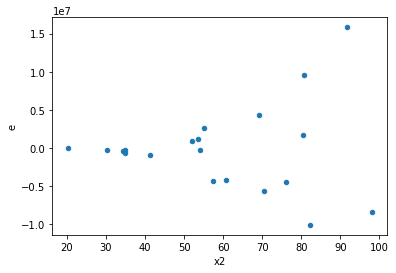

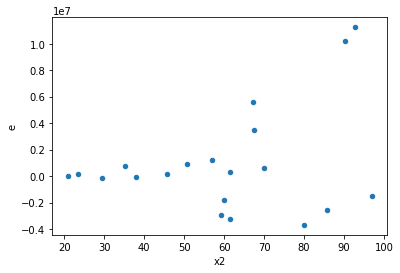

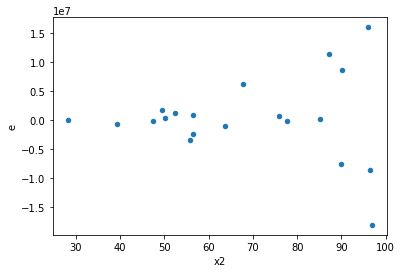

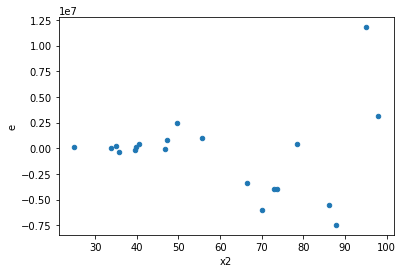

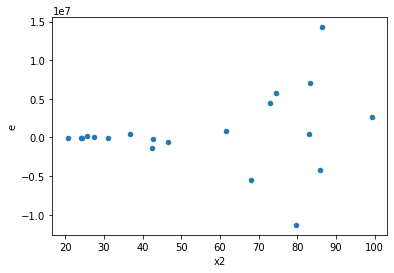

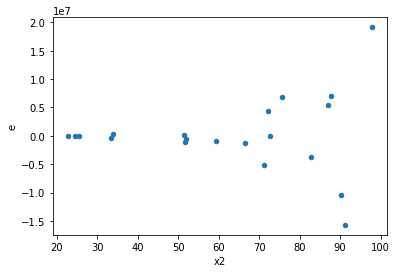

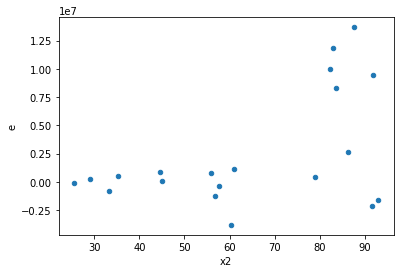

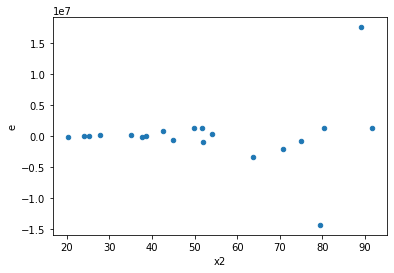

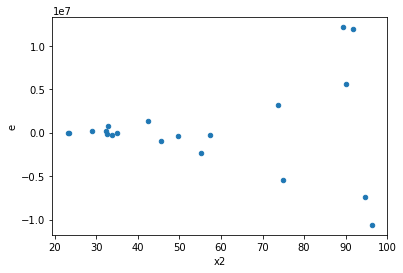

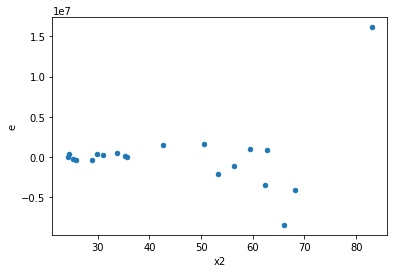

In [12]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero 

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,7.0,7.0,54060619151392.27,80542458730615.31,9010103191898.713,13423743121769.219,1.489854537275329,0.6119078818987442,0.6940460590506279,Reject001=1 : Homoscedasticity
2.0,7.0,7.0,17284674464082.992,728068800869311.8,2880779077347.1655,121344800144885.3,42.12221655560917,6.759908344866616e-05,0.9999662004582757,Reject001=0 : Heteroscedasticity
5.0,8.0,6.0,16600207459436.268,637642910269676.9,2371458208490.8955,127528582053935.38,51.21565794305488,1.1934767519816702e-05,0.9999940326162401,Reject001=0 : Heteroscedasticity
6.0,4.0,10.0,46965775575528.27,250093912400865.16,15655258525176.092,27788212488985.016,2.130009857911749,0.48537915464764136,0.7573104226761793,Reject001=1 : Homoscedasticity
10.0,5.0,9.0,44651561881630.664,515049356536957.2,11162890470407.666,64381169567119.65,6.408253582886112,0.05461107993608816,0.9726944600319559,Reject001=1 : Homoscedasticity
11.0,10.0,4.0,311668213932433.44,466107794201413.8,34629801548048.16,155369264733804.6,3.738814012506753,0.08258293683735785,0.9587085315813211,Reject001=1 : Homoscedasticity
14.0,9.0,5.0,96449625947520.88,67282502996941.336,12056203243440.11,16820625749235.334,1.2556658898852615,0.7208177842106269,0.6395911078946865,Reject001=1 : Homoscedasticity
16.0,7.0,7.0,254742145652842.5,374030047911017.94,42457024275473.75,62338341318502.99,1.468269205915925,0.6249195772489959,0.687540211375502,Reject001=1 : Homoscedasticity
19.0,9.0,5.0,6743365340345.97,554519269063385.3,842920667543.2462,138629817265846.33,148.01729313732898,4.6572776968289986e-08,0.9999999767136115,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,7.0,54060619151392.27,80542458730615.31,9010103191898.713,13423743121769.219,1.489854537275329,1.3880921181012558,Reject001=1 : Homoscedasticity
1.0,8.0,6.0,122545906158081.39,9908216370333.742,17506558022583.057,1981643274066.7485,0.10780413295408794,0.014090649050680344,Reject001=1 : Homoscedasticity
2.0,7.0,7.0,17284674464082.992,728068800869311.8,2880779077347.1655,121344800144885.3,42.12221655560917,6.759908344866616e-05,Reject001=0 : Heteroscedasticity
3.0,4.0,10.0,160539082460909.28,27353520573130.25,53513027486969.76,3039280063681.1387,0.06815417194075651,0.0006894949983087367,Reject001=0 : Heteroscedasticity
4.0,11.0,3.0,381994243043072.56,13564106751064.516,38199424304307.26,6782053375532.258,0.13019844930392988,0.11975667053181463,Reject001=1 : Homoscedasticity
5.0,8.0,6.0,16600207459436.268,637642910269676.9,2371458208490.8955,127528582053935.38,51.21565794305488,1.1934767519816702e-05,Reject001=0 : Heteroscedasticity
6.0,4.0,10.0,46965775575528.27,250093912400865.16,15655258525176.092,27788212488985.016,2.130009857911749,0.48537915464764136,Reject001=1 : Homoscedasticity
7.0,3.0,11.0,82515370665829.23,180944002552073.38,41257685332914.62,18094400255207.336,0.5980505684478431,0.4601308301650908,Reject001=1 : Homoscedasticity
8.0,6.0,8.0,491456130336982.25,2411071528878.036,98291226067396.45,344438789839.7194,0.003679481310811216,1.690916457278775e-08,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      504
Reject001=0 : Heteroscedasticity    496
Name: Result_test, dtype: int64